### Log-sum-exp problem
### $$ \min_x \log\sum_{i=1}^{M}\exp{(\langle a_i,x\rangle -b_i)}+\frac{\mu}{2}\vert\vert x\vert\vert^2 $$
### where $a_1, a_2, \cdots, a_m\in R^n$, $b_1, b_2, \cdots, b_m\in R$ and $\gamma>0$. We notice that the Lipschitz constant $L=$  

In [164]:
# First we import some useful packages. Don't import any other package.
import numpy as np
import matplotlib.pyplot as plt
import time as clock

### Initialization of the model

In [179]:
np.random.seed(114514)
A = np.random.uniform(-1,1,(500,200))
b = np.random.uniform(-1,1,(500,1))
x0 = 0.001*np.ones((200,1))#np.random.uniform(-1,1,(100,1)) #0.5

In [180]:
mu = 1

### Algorithm

In [181]:
L = 2*np.max(np.diag(A@A.T)) + mu
stepsize = 1/(2*L)
H = 2
Model = {'A':A, 'b':b, 'mu':mu,'x':x0,'Lip':L,'H':2};
options= {'stepsize':stepsize}

In [182]:
#Load 
from Mathtools import *
from gradNewton import *
from HBF import *
from CubicNewton import *
from CubicSR1 import *
from GradQN import *
from gd import *

In [183]:
#test
maxiter = 20000;
check = 1
tol = 1e-10;

# taping:
xs = [];
rs = [];
fs = [];
ts = [];
cols = [];
legs = [];

nams = [];

# colors for the image
COLSR1 = [(1,0,0,1), (1,0.5,0,1), (1,0,0.5,1), (0,0.5,0.5,1), (0.5,0.5,0,1) ]
COLBFGS =  [(0.3,0.7,0,1), (0.7,0.2,0.3,1), (0,0,0,1), (0.5,0,0.2,1), (0.2,0.2,0.7,1) ]

In [184]:
# turn algorithms to be run on or off
run_grad_SR1 = 1; #grad SR1 ad with safeguard

run_grad_Newton = 1;
run_Cubic_Newton = 1;
run_Cubic_SR1 = 1;

run_HBF = 1
run_gd =1
# with open('opt.npy', 'rb') as f:
#     opt= np.load(f)
compute_optimal_value = False;


if compute_optimal_value: # optimal solution is compyted using FISTA
    maxiter = 10000;
    check = 1000;
    
    run_fista = 0;
    run_grad_SR1_sf = 0; #grad SR1 ad
    run_gd = 1
    
    
    
    

In [185]:
#####################################################################
if run_Cubic_Newton:
    
    print('');
    print('********************************************************');
    print('***Cubic Newton **');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True,
        
    }

   
    
    output = Cubic_Newton(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time']);
    fs.append(output['seq_fun']);
    cols.append((0.1,0.1,0.6,1));
    legs.append('Cubic Newton');
    nams.append('Cubic Newton');


********************************************************
***Cubic Newton **
***********
iter:1, funValue:6.389719,fun:6.389719
iter:2, funValue:6.328126,fun:6.328126
iter:3, funValue:6.323439,fun:6.323439
iter:4, funValue:6.323381,fun:6.323381
iter:5, funValue:6.323381,fun:6.323381
iter:6, funValue:6.323381,fun:6.323381
iter:7, funValue:6.323381,fun:6.323381
Tolerence value reached


In [186]:
#####################################################################
if run_grad_Newton:
    
    print('');
    print('********************************************************');
    print('***Grad Newton **');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True,
        
    }

   
    
    output = grad_Newton(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time']);
    fs.append(output['seq_fun']);
    cols.append((0.1,0.1,0,1));
    legs.append('Grad Newton');
    nams.append('Grad Newton');


********************************************************
***Grad Newton **
***********
iter:1, funValue:6.389725,fun:6.389725
iter:2, funValue:6.334790,fun:6.334790
iter:3, funValue:6.324534,fun:6.324534
iter:4, funValue:6.323432,fun:6.323432
iter:5, funValue:6.323381,fun:6.323381
iter:6, funValue:6.323381,fun:6.323381
iter:7, funValue:6.323381,fun:6.323381
iter:8, funValue:6.323381,fun:6.323381
iter:9, funValue:6.323381,fun:6.323381
iter:10, funValue:6.323381,fun:6.323381
Tolerence value reached


In [187]:
#####################################################################
if run_Cubic_SR1:
    
    print('');
    print('********************************************************');
    print('***Cubic SR1 **');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True,
        
    }

   
    
    output = Cubic_SR1(Model, options, tol, 800, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time']);
    fs.append(output['seq_fun']);
    cols.append((0.8,0.5,0.6,1));
    legs.append('Cubic SR1 PQN');
    nams.append('Cubic SR1 PQN');


********************************************************
***Cubic SR1 **
***********
iter:1, funValue:6.389719,fun:6.389719
iter:2, funValue:6.329347,fun:6.329347
iter:3, funValue:6.325800,fun:6.325800
iter:4, funValue:6.324981,fun:6.324981
iter:5, funValue:6.324928,fun:6.324928
iter:6, funValue:6.324790,fun:6.324790
iter:7, funValue:6.323629,fun:6.323629
iter:8, funValue:6.323429,fun:6.323429
iter:9, funValue:6.323421,fun:6.323421
iter:10, funValue:6.323419,fun:6.323419
iter:11, funValue:6.323415,fun:6.323415
iter:12, funValue:6.323386,fun:6.323386
iter:13, funValue:6.323382,fun:6.323382
iter:14, funValue:6.323382,fun:6.323382
iter:15, funValue:6.323382,fun:6.323382
iter:16, funValue:6.323381,fun:6.323381
iter:17, funValue:6.323381,fun:6.323381
iter:18, funValue:6.323381,fun:6.323381
iter:19, funValue:6.323381,fun:6.323381
iter:20, funValue:6.323381,fun:6.323381
iter:21, funValue:6.323381,fun:6.323381
iter:22, funValue:6.323381,fun:6.323381
iter:23, funValue:6.323381,fun:6.323381
ite

In [188]:
#####################################################################
if run_grad_SR1:
    
    print('');
    print('********************************************************');
    print('***Gradient reg SR1 ***');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True        
    }

   
    
    output = Grad_SR1(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time']);
    fs.append(output['seq_fun']);
    cols.append((0.8,0.1,0,1));
    legs.append('Grad SR1 PQN');
    nams.append('Grad SR1 PQN');


********************************************************
***Gradient reg SR1 ***
***********
iter:1, funValue:6.389719,fun:6.389719
iter:2, funValue:6.345675,fun:6.345675
*****number of iterations***
3
iter:3, funValue:6.345330,fun:6.345330
iter:4, funValue:6.329063,fun:6.329063
*****number of iterations***
5
iter:5, funValue:6.328979,fun:6.328979
iter:6, funValue:6.324379,fun:6.324379
iter:7, funValue:6.323611,fun:6.323611
*****number of iterations***
8
iter:8, funValue:6.323608,fun:6.323608
iter:9, funValue:6.323395,fun:6.323395
iter:10, funValue:6.323383,fun:6.323383
iter:11, funValue:6.323383,fun:6.323383
iter:12, funValue:6.323383,fun:6.323383
iter:13, funValue:6.323382,fun:6.323382
iter:14, funValue:6.323381,fun:6.323381
iter:15, funValue:6.323381,fun:6.323381
iter:16, funValue:6.323381,fun:6.323381
iter:17, funValue:6.323381,fun:6.323381
iter:18, funValue:6.323381,fun:6.323381
iter:19, funValue:6.323381,fun:6.323381
iter:20, funValue:6.323381,fun:6.323381
iter:21, funValue:6.32

In [189]:
if run_HBF:
    
    print('');
    print('********************************************************');
    print('***Accelerated ***');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'storeTime'     : True,
        
        'storeBeta' : False,
    }

   
    
    output = HBF(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time']);
    
    fs.append(output['seq_obj']);
    
    cols.append((0.4,0.5,0,1));
    legs.append('HBF');
    nams.append('HBF');


********************************************************
***Accelerated ***
***********
iter:1, time:1731936894.053176, tau:0.021114,fun:6.387120
iter:2, time:1731936894.053970, tau:0.021114,fun:6.380674
iter:3, time:1731936894.054582, tau:0.021114,fun:6.372482
iter:4, time:1731936894.054960, tau:0.021114,fun:6.363527
iter:5, time:1731936894.055343, tau:0.021114,fun:6.354651
iter:6, time:1731936894.055595, tau:0.021114,fun:6.346502
iter:7, time:1731936894.055839, tau:0.021114,fun:6.339507
iter:8, time:1731936894.056101, tau:0.021114,fun:6.333886
iter:9, time:1731936894.056350, tau:0.021114,fun:6.329678
iter:10, time:1731936894.056656, tau:0.021114,fun:6.326789
iter:11, time:1731936894.056904, tau:0.021114,fun:6.325030
iter:12, time:1731936894.057208, tau:0.021114,fun:6.324164
iter:13, time:1731936894.057471, tau:0.021114,fun:6.323943
iter:14, time:1731936894.057727, tau:0.021114,fun:6.324133
iter:15, time:1731936894.057982, tau:0.021114,fun:6.324535
iter:16, time:1731936894.061933, ta

In [190]:
if run_gd:
    
    print('');
    print('********************************************************');
    print('***Gradient  ***');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'storeTime'     : True,
        
        'storeBeta' : False,
    }

   
    
    output = gd(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time']);
    fs.append(output['seq_obj']);
    
    cols.append((0.4,0.2,0,1));
    legs.append('GD');
    nams.append('GD');


********************************************************
***Gradient  ***
***********
iter:1, time:1731936894.846789, tau:0.003069,fun:6.390258
iter:2, time:1731936894.852633, tau:0.003069,fun:6.389721
iter:3, time:1731936894.852976, tau:0.003069,fun:6.389188
iter:4, time:1731936894.854097, tau:0.003069,fun:6.388660
iter:5, time:1731936894.854429, tau:0.003069,fun:6.388137
iter:6, time:1731936894.854750, tau:0.003069,fun:6.387617
iter:7, time:1731936894.855072, tau:0.003069,fun:6.387102
iter:8, time:1731936894.855361, tau:0.003069,fun:6.386591
iter:9, time:1731936894.855641, tau:0.003069,fun:6.386084
iter:10, time:1731936894.855950, tau:0.003069,fun:6.385582
iter:11, time:1731936894.856236, tau:0.003069,fun:6.385083
iter:12, time:1731936894.856529, tau:0.003069,fun:6.384589
iter:13, time:1731936894.856915, tau:0.003069,fun:6.384099
iter:14, time:1731936894.857253, tau:0.003069,fun:6.383613
iter:15, time:1731936894.857547, tau:0.003069,fun:6.383130
iter:16, time:1731936894.857873, tau:

iter:1924, time:1731936895.046897, tau:0.003069,fun:6.323381
iter:1925, time:1731936895.053230, tau:0.003069,fun:6.323381
iter:1926, time:1731936895.093812, tau:0.003069,fun:6.323381
iter:1927, time:1731936895.093949, tau:0.003069,fun:6.323381
iter:1928, time:1731936895.094039, tau:0.003069,fun:6.323381
iter:1929, time:1731936895.094126, tau:0.003069,fun:6.323381
iter:1930, time:1731936895.094213, tau:0.003069,fun:6.323381
iter:1931, time:1731936895.094294, tau:0.003069,fun:6.323381
iter:1932, time:1731936895.094383, tau:0.003069,fun:6.323381
iter:1933, time:1731936895.094473, tau:0.003069,fun:6.323381
iter:1934, time:1731936895.094559, tau:0.003069,fun:6.323381
iter:1935, time:1731936895.094648, tau:0.003069,fun:6.323381
iter:1936, time:1731936895.094746, tau:0.003069,fun:6.323381
iter:1937, time:1731936895.094830, tau:0.003069,fun:6.323381
iter:1938, time:1731936895.094927, tau:0.003069,fun:6.323381
iter:1939, time:1731936895.095012, tau:0.003069,fun:6.323381
iter:1940, time:17319368

iter:3749, time:1731936895.253491, tau:0.003069,fun:6.323381
iter:3750, time:1731936895.258925, tau:0.003069,fun:6.323381
iter:3751, time:1731936895.303409, tau:0.003069,fun:6.323381
iter:3752, time:1731936895.304808, tau:0.003069,fun:6.323381
iter:3753, time:1731936895.311136, tau:0.003069,fun:6.323381
iter:3754, time:1731936895.311275, tau:0.003069,fun:6.323381
iter:3755, time:1731936895.311357, tau:0.003069,fun:6.323381
iter:3756, time:1731936895.311688, tau:0.003069,fun:6.323381
iter:3757, time:1731936895.311773, tau:0.003069,fun:6.323381
iter:3758, time:1731936895.311870, tau:0.003069,fun:6.323381
iter:3759, time:1731936895.311953, tau:0.003069,fun:6.323381
iter:3760, time:1731936895.312037, tau:0.003069,fun:6.323381
iter:3761, time:1731936895.312133, tau:0.003069,fun:6.323381
iter:3762, time:1731936895.312220, tau:0.003069,fun:6.323381
iter:3763, time:1731936895.312313, tau:0.003069,fun:6.323381
iter:3764, time:1731936895.312397, tau:0.003069,fun:6.323381
iter:3765, time:17319368

iter:5172, time:1731936895.459202, tau:0.003069,fun:6.323381
iter:5173, time:1731936895.464602, tau:0.003069,fun:6.323381
iter:5174, time:1731936895.481905, tau:0.003069,fun:6.323381
iter:5175, time:1731936895.481996, tau:0.003069,fun:6.323381
iter:5176, time:1731936895.482091, tau:0.003069,fun:6.323381
iter:5177, time:1731936895.482188, tau:0.003069,fun:6.323381
iter:5178, time:1731936895.482278, tau:0.003069,fun:6.323381
iter:5179, time:1731936895.482366, tau:0.003069,fun:6.323381
iter:5180, time:1731936895.482463, tau:0.003069,fun:6.323381
iter:5181, time:1731936895.482552, tau:0.003069,fun:6.323381
iter:5182, time:1731936895.482639, tau:0.003069,fun:6.323381
iter:5183, time:1731936895.482737, tau:0.003069,fun:6.323381
iter:5184, time:1731936895.482832, tau:0.003069,fun:6.323381
iter:5185, time:1731936895.482923, tau:0.003069,fun:6.323381
iter:5186, time:1731936895.483021, tau:0.003069,fun:6.323381
iter:5187, time:1731936895.483112, tau:0.003069,fun:6.323381
iter:5188, time:17319368

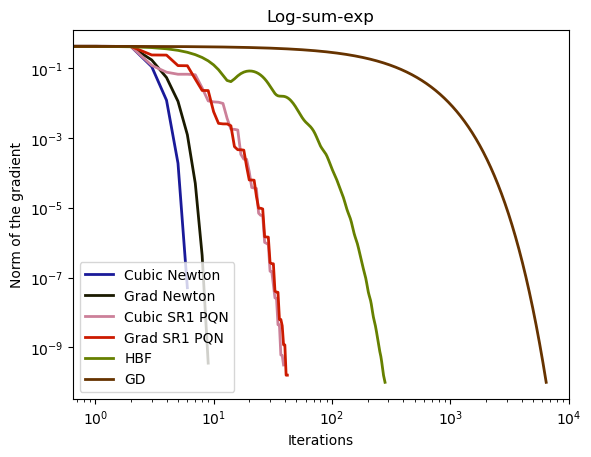

<Figure size 640x480 with 0 Axes>

In [191]:
nalgs = len(rs);
#nalgs = len(fs);

# plotting
fig1 = plt.figure();
# CX = np.arange(1,maxiter,1)
# logCY = np.log(10/(CX)**(1/2))*(maxiter/2)
# GX = np.arange(1,maxiter,1)
# logGY = np.log(10/(GX)**(1/4))*(maxiter/2)
for i in range(0,nalgs):
    iterations = np.arange(0,len(rs[i])-1,1)
    
    plt.plot(iterations, rs[i][0:-1], '-', color=cols[i], linewidth=2);
    #plt.plot(iterations,fs[i][1:-1], '-', color=cols[i], linewidth=2);
    
    
plt.legend(legs);
plt.yscale('log');


#plt.plot(CX, CY, '--', color='black', linewidth=2);
plt.xscale('log');

#plt.xlabel('seq_time')
plt.xlabel('Iterations')
plt.ylabel('Norm of the gradient');
plt.title('Log-sum-exp')
plt.savefig('AllalgorithmRegSr1LogSumExp(PQN2Nov18).pdf')

plt.show();
plt.draw();


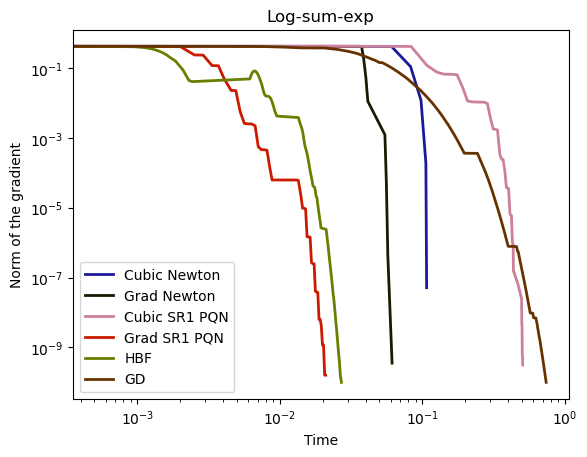

<Figure size 640x480 with 0 Axes>

In [192]:
nalgs = len(rs);
#nalgs = len(fs);

# plotting
fig1 = plt.figure();
for i in range(0,nalgs):
    plt.plot(ts[i][0:-1], rs[i][0:-1], '-', color=cols[i], linewidth=2);
    #plt.plot(iterations,fs[i][1:-1], '-', color=cols[i], linewidth=2);

plt.legend(legs);
plt.yscale('log');
plt.xscale('log');

plt.xlabel('Time')
#plt.xlabel('seq_iter')
plt.ylabel('Norm of the gradient');
plt.title('Log-sum-exp')
plt.savefig('AllalgorithmRegSr1LogSumExp(PQN)(timeNov18).pdf')

plt.show();
plt.draw();
